# 와인 품질 분류 모델
### 의사결정나무
#### 60170029 이종언

# 1) 데이터 로딩
### 1-1) 라이브러리 불러오기

In [1]:
#pandas, numpy 호출
import pandas as pd 
import numpy as np
#sklearn 호출
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets

### 1-2) 데이터프레임으로 데이터 읽어오기

In [2]:
df = pd.read_csv("wine.csv") #csv 데이터 입력, 칼럼인덱스 미사용
df.head(8) #불러온 데이터프레임 상위 8개값 호출

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


### 1-3) 데이터 확인

In [3]:
print('Column 수 : %s' % df.shape[0])
print('Row 수 : %s' % df.shape[1])
print('\n[Column 리스트]\n',df.columns.tolist())
print('\n[데이터프레임 정보]')
df.info() #데이터프레임의 정보 표시

print('\n[통계]')
df.describe() #데이터프레임의 각 칼럼의 통계정보 표시

Column 수 : 1599
Row 수 : 12

[Column 리스트]
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

[데이터프레임 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2) 데이터 전처리 시작

### 2-1) 목표변수로 할 Y값 분류

Quality list :  [5 6 7 4 8 3]
Quality list count :  [681, 638, 199, 53, 18, 10]


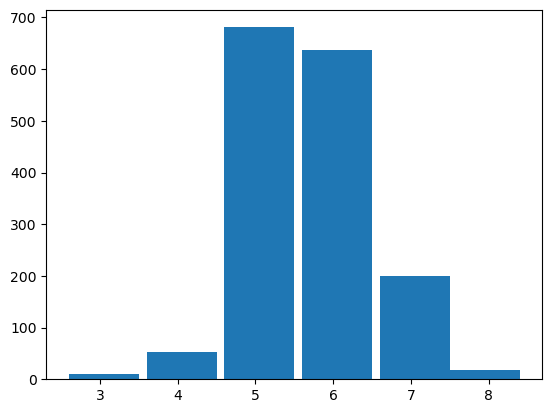

In [4]:
#칼럼에 유니크한 값 종류 추출 및 유니크한 값 카운트
quality_univalue = df['quality'].unique()
quality_unicount = df['quality'].value_counts().tolist() #df['quality'].value_counts().values 대체가능
print('Quality list : ',quality_univalue) # print(df.groupby(['quality']).quality.count().tolist()) 와 동일
print('Quality list count : ',quality_unicount)

#plot 라이브러리 호출
import matplotlib.pyplot as plot

#quality 열을 1차원 배열에 저장해 히스토그램으로 표시
data = np.array(df.iloc[:,11])
plot.hist(data,bins=10)

#바그래프 출력 (x값 , height 값)
plot.bar(quality_univalue, quality_unicount)
plot.show()

#### 목표변수값이 5,6 에 편향되어 있어 추후 3,4,7,8 에 대한 모델 분류가 쉽지 않을 것이 예상됨

### 2-2) 결과값 분류
#### Quality 에서 3,4 는 C등급 / 5는 B등급 / 6은 A등급 / 7,8은 S등급으로 분류

In [5]:
#속성 매핑 전 데이터프레임 백업
df1 = df.copy()

divide = {3:'C',4:'C',5:'B',6:'A',7:'S',8:'S'}
df["quality"] = df.quality.map(divide)

# 다른 방식(함수적용)
#def mapfunc(a):
#    if a>=7:
#        a = 'S'
#    elif a==6:
#        a = 'A'
#    elif a==5:
#        a = 'B'
#    else:
#        a = 'C'
#df["quality"].apply(mapfunc)
#또는 lambda 함수 사용
#df["quality"] = df.quality.map(lambda x: 'S' if x>=7 else 'A' if x==6 else 'B' if x==5 else 'C')

#인덱싱을 위해 column의 공백 '_' 로 대체
df.columns = df.columns.str.replace(' ','_')
#만약 데이터값 변경을 원하면 
#df['quality'].replace(바꾸고 싶은 값, 바꿀값, inplace = True)

df.head(7) #분류된 Quality 값 확인 및 Column 확인

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,B
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,A
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,B
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,B
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,B


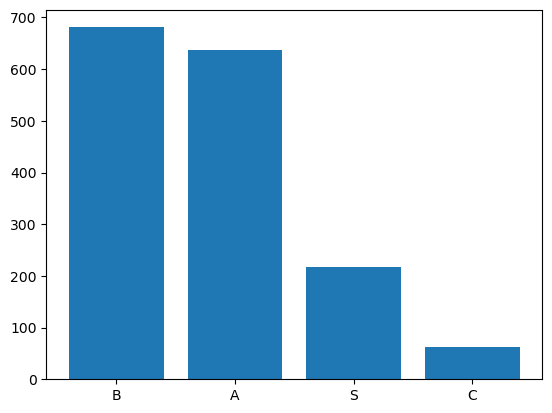

In [6]:
data = np.array(df.iloc[:,11])
#바그래프 출력(x값, height 값)
plot.bar(df['quality'].unique(), df['quality'].value_counts().tolist())
#plot.hist(data,bins=4) // 미사용, 2차원 데이터를 통째로 plot 에 히스토그램으로 넣을때
plot.show()

#### 목표변수 값이 A등급과 B등급에 편향되어 있는 것을 확인함

### 2-3) 결측치 확인

In [7]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### - 결측치 없음

### 2-4) 잡음 및 칼럼 제거

#### 각 요소별 분포도 히스토그램으로 표시

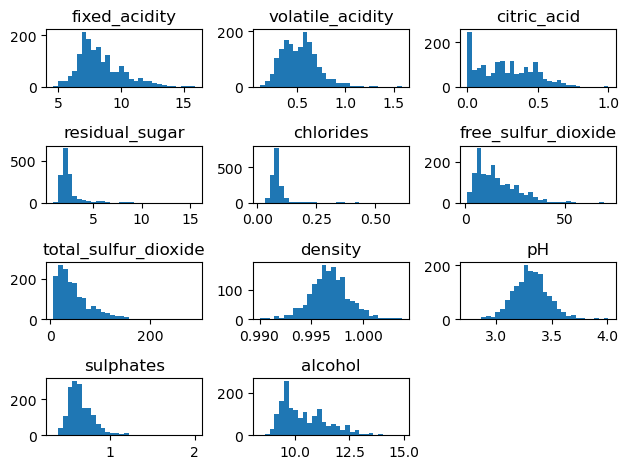

In [8]:
for i in range(df.shape[1]-1): # df.shape[1]-1 하여 Quality 칼럼은 미표시함
    data = np.array(df.iloc[:,i]) #각 열별로 1차원 Array 에 값 저장
    plot.subplot(4,3,i+1) # 4x3 서브플롯의 index 1부터 1차원 Array 값 입력
    plot.hist(data,bins=30)
    plot.title(df.columns[i]) #각 서브플롯별로 Title 을 df의 칼럼명으로 입력
    
plot.tight_layout() #서브플롯별로 겹치지 않게 Layout 설정
plot.show()

#### 편차치가 작은 residual sugar, chlorides 요소를 제거하기로 하였다

In [9]:
dfbkup = df.copy() #특정 칼럼 제거 전 데이터프레임 백업 (추후 전처리 이후 모델과 비교하기 위해)
df = df.drop(['residual_sugar', 'chlorides'],axis=1) #residual sugar, chlorides 칼럼 세로축으로 제거
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,B
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8,B
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8,B


### 2-5) 상관계수 분석 및 제거

In [10]:
dfcorr=df1.corr() #상관계수 분석
dfcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

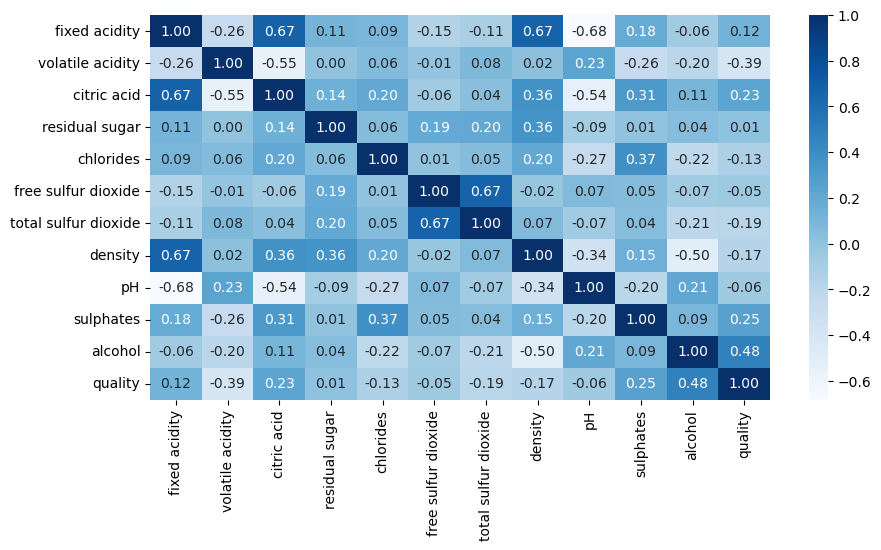

In [11]:
import seaborn as sns #seaborn 호출
plot.figure(figsize=(10,5)) #10x5 크기로 설정
sns.heatmap(data = dfcorr, annot=True, fmt = '0.2f', cmap='Blues')
#상관계수분석 기반 heatmap 작성, 수치(annot) 표시, 표시형식은 소숫점 2자리까지, 컬러는 블루

#### free sulfur dioxide와 pH의 quality 값에 대한 상관계수 절대값이 0.05와 0.06로 낮게 나타나 해당 칼럼 또한 배제하기로 함
#### 이미 제거한 residual sugar 값도 상관계수가 0.01로 상관도가 매우 낮게 나타남

In [12]:
df = df.drop(['free_sulfur_dioxide', 'pH'],axis=1)
df

,fixed_acidity,volatile_acidity,citric_acid,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,B
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,B
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,B
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,A
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,B
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,B
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,A
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,A
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,B


In [13]:
X = np.array(df.iloc[:,:7]) #처음~마지막-1개 칼럼 포함한 모든 행 집어넣기, 속성값 X로 저장
Y = np.array(df['quality']) #quality 값을 목표변수 Y로 저장


In [14]:
X #속성

array([[ 7.4    ,  0.7    ,  0.     , ...,  0.9978 ,  0.56   ,  9.4    ],
       [ 7.8    ,  0.88   ,  0.     , ...,  0.9968 ,  0.68   ,  9.8    ],
       [ 7.8    ,  0.76   ,  0.04   , ...,  0.997  ,  0.65   ,  9.8    ],
       ...,
       [ 6.3    ,  0.51   ,  0.13   , ...,  0.99574,  0.75   , 11.     ],
       [ 5.9    ,  0.645  ,  0.12   , ...,  0.99547,  0.71   , 10.2    ],
       [ 6.     ,  0.31   ,  0.47   , ...,  0.99549,  0.66   , 11.     ]])

In [15]:
Y #목표변수

array(['B', 'B', 'B', ..., 'A', 'B', 'A'], dtype=object)

# 3)모델 적합

#### 훈련 데이터와 테스트 데이터 분리

In [16]:
# Split 라이브러리 호출
from sklearn.model_selection import train_test_split
#훈련시킬 데이터 세트와 테스트용 데이터 셋트로 데이터 구분(여기서는 약 10 대 3 로 분리)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)
#random_state : 랜덤으로 뽑는 방식 지정, 시드를 12345로 줌

#[훈련데이터]
print("X_train 크기:", X_train.shape)
print("Y_train 크기:", Y_train.shape)

#[테스트데이터]
print("X_test 크기:", X_test.shape)
print("Y_test 크기:", Y_test.shape)

X_train 크기: (1199, 7)
Y_train 크기: (1199,)
X_test 크기: (400, 7)
Y_test 크기: (400,)


#### 의사결정나무 모델 훈련

In [17]:
#의사결정나무 모델 라이브러리 호출
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10, random_state=12345)
#max_depth 제한 10(미지정 시 None 이 기본으로 과다하게 가지치기가 이뤄져 과대적합으로 테스트 데이터 예측 어려운 문제 발생할 수도 있음)

#훈련 데이터로 의사결정나무 모델을 훈련
tree.fit(X_train, Y_train)
#의사결정나무가 테스트 속성값으로 목표변수값을 예측하도록 함
y_pred_res = tree.predict(X_test)

# 4) 모델 성능평가

In [18]:
#훈련 데이터의 속성값으로 예측한 결과가 테스트 데이터의 목표변수와 얼마나 맞는지 평가

# Training 값을 X_test 에서 넣음
print("[예측값]\n", y_pred_res) #와인의 등급을 분류한 값
print("[실제값]\n", Y_test) #실제 와인의 등급값

[예측값]
 ['B' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'A'
 'B' 'C' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'S' 'A' 'A'
 'B' 'B' 'A' 'B' 'A' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'B'
 'S' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B'
 'A' 'B' 'B' 'A' 'S' 'C' 'A' 'S' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'A' 'B'
 'B' 'B' 'A' 'B' 'S' 'S' 'A' 'A' 'S' 'A' 'A' 'B' 'B' 'S' 'A' 'A' 'A' 'B'
 'B' 'B' 'B' 'A' 'A' 'A' 'B' 'A' 'S' 'S' 'B' 'A' 'B' 'A' 'B' 'S' 'B' 'A'
 'B' 'B' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'S' 'A'
 'B' 'C' 'A' 'A' 'S' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B'
 'A' 'B' 'A' 'S' 'A' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'B' 'S' 'B' 'B' 'A'
 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'S' 'B' 'A' 'B' 'B' 'B' 'B'
 'C' 'S' 'S' 'B' 'B' 'A' 'S' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'C'
 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'S' 'B' 'A' 'B' 'C' 'B' 'B' 'A' 'A' 'B' 'A'

## 4-1) 정확도 계산

In [19]:
#정확도 계산 모듈 호출
from sklearn.metrics import accuracy_score, confusion_matrix

#실제 값과 예측값 간 정확도 계산
#y_pred_res (예측한 걸 넣어둔 거랑) ytest (실제 결과) 사이의 정확도를 계산함
print('정확도: %0.2f%%' % (accuracy_score(Y_test, y_pred_res)*100))

정확도: 67.75%


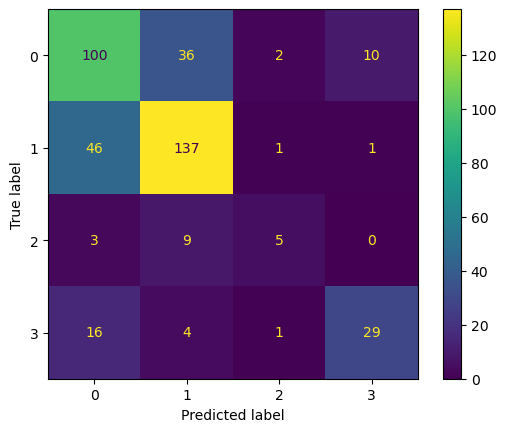

In [20]:
#오차행렬(Confusion Matrix) 
cmatrix = confusion_matrix(Y_test, y_pred_res)
#시각화 라이브러리 호출
from sklearn.metrics import ConfusionMatrixDisplay
cmatrix = ConfusionMatrixDisplay(cmatrix)
cmatrix.plot()
#왼쪽 위와 우측 아래가 잘 맞춘 경우(TT, TN))

In [21]:
# 측정 라이브러리 호출
from sklearn.metrics import precision_score, recall_score, f1_score

#정확도 계산 메소드
print('Accuracy: %0.4f'% accuracy_score(Y_test, y_pred_res))
print('Precision: %0.4f'% precision_score(Y_test, y_pred_res, average='macro'))
print('recall: %0.4f'% recall_score(Y_test, y_pred_res, average='macro'))
print('f1-score: %0.4f'% f1_score(Y_test, y_pred_res, average='macro'))
# Accuracy : TP + TN / Total
# Precision : TP / (TP + FP)
# recall : TP / (TP + FN)
# f1-score : 가중치 1일때

Accuracy: 0.6775
Precision: 0.6558
recall: 0.5726
f1-score: 0.6016


#### 모델의 정확도 : 67.75%
#### 모델의 정밀도 : 65.58%
#### 모델의 재현율 : 57.26%
#### 모델의 F1-score : 0.6016

In [22]:
#모델 성능 종합 평가 모듈 호출
from sklearn.metrics import classification_report

# 추가) 전처리 이전의 데이터 모델(2) 성능 평가

#### 상관계수 분석과 밀집도 시각화로 일부 칼럼을 제거하기 전의 데이터가 훈련된 모델 2를 만들어
#### 앞선 모델과 비교하려고 한다.
#### 모델 3은 max_depth 값을 제한하지 않고 훈련시킨 모델이다.

In [23]:
# 전처리 이전 훈련데이터 기반 모델2 생성
X1 = np.array(dfbkup.iloc[:,:11]) #처음~마지막-1개 칼럼 포함한 모든 행 집어넣기, 속성값 X로 저장
Y1 = np.array(dfbkup['quality']) #quality 값을 목표변수 Y로 저장
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=12345)
tree1 = DecisionTreeClassifier(max_depth=10, random_state=12345)
tree1.fit(X1_train, Y1_train)

# max_depth 값이 none 일 때의 모델 3 생성
tree2 = DecisionTreeClassifier(random_state=12345)
tree2.fit(X_train, Y_train)

print('/////////////////////////////////')
print('[모델1]')
print(classification_report(Y_test, tree.predict(X_test)))
print('모델 1 정확도: %0.4f'% accuracy_score(Y_test, y_pred_res))

print('/////////////////////////////////')
print('[모델2]')
print(classification_report(Y1_test, tree1.predict(X1_test)))
print('모델 2 정확도: %0.4f'% accuracy_score(Y1_test, tree1.predict(X1_test)))

print('/////////////////////////////////')
print('[모델3]')
print(classification_report(Y_test, tree2.predict(X_test)))
print('모델 3 정확도: %0.4f'% accuracy_score(Y_test, tree2.predict(X_test)))

/////////////////////////////////
[모델1]
              precision    recall  f1-score   support

           A       0.61      0.68      0.64       148
           B       0.74      0.74      0.74       185
           C       0.56      0.29      0.38        17
           S       0.72      0.58      0.64        50

    accuracy                           0.68       400
   macro avg       0.66      0.57      0.60       400
weighted avg       0.68      0.68      0.67       400

모델 1 정확도: 0.6775
/////////////////////////////////
[모델2]
              precision    recall  f1-score   support

           A       0.55      0.58      0.57       148
           B       0.71      0.72      0.72       185
           C       0.33      0.12      0.17        17
           S       0.53      0.54      0.53        50

    accuracy                           0.62       400
   macro avg       0.53      0.49      0.50       400
weighted avg       0.61      0.62      0.61       400

모델 2 정확도: 0.6200
////////////////

#### 전처리된 모델1의 정확도(0.68)가 모델 2의 정확도(0.62)보다 비교적 높게 나타났고,
#### max-depth 값이 제한되지 않은 모델 3의 경우 정확도에 있어 모델 1과 미미한 차이를 보였음

# [후기]
#### 
#### [목표변수의 종류를 4가지로 설정]
#### 목표변수의 종류를 4가지로 결정하여 모델을 훈련시켰기에 비교적 예측성능이 낮은 모델이 만들어졌다, 하지만 목표변수의 종류를 3가지로 줄일 경우 전체 표본의 82.4%를 차지하는 중간값이 들어간 클래스로 분류될 가능성이 높기에 분류의 의의가 없다.
#### 
#### [시드값에 따른 결과의 편차가 크다]
#### 훈련데이터와 테스트데이터를 분류하고 의사결정나무 모델적합 시 정확도 67%라는 비교적 높은 정확도가 나오나, 다른 시드를 적용 시 56% 정도의 낮은 정확도가 나오기도 했었다.
#### 
#### [Quality 데이터의 특정 값 편중 현상에 의한 예측 성능 저하]
#### C등급에 대한 precision 값이 0.56으로 타 등급보다 비교적 낮게 나타났음. 이는 A등급과 B등급 클래스에 훈련값이 편향되어 있어 모델의 예측성능이 낮은 것으로 예상된다. 이럴 땐 C등급에 대한 가중치를 증가시키거나 모델을 훈련시킬 땐 다양한 케이스가 포함된 데이터가 있어야 효과적이다.
#### 
#### [max depth 옵션의 차이]
#### max_depth 를 지정하지 않은 모델3 에서는 68.25% 의 정확도를 보이는데 max_depth 를 10으로 지정 시 67.75%의 정확도가 나왔다. none 옵션을 주었을 때에는 무제한으로 가지치기를 하여  과대적합의 문제가 생길 수도 있는데 이번 모델에서는 확인하기 어려웠다.
#### 
#### [데이터 전처리에 따른 차이]
#### 전처리 과정을 통해 상관계수가 적거나 값의 편차가 적은 변수를 제거하였고 예측모델의 정확도에 큰 영향을 미쳤다.

# 와인 최적 나무깊이 찾기

In [24]:
train_scores, test_scores = list(), list()
for i in range(1,60):
    DT1 = DecisionTreeClassifier(max_depth=i, random_state=12345)
    DT1.fit(X_train, Y_train)
    
    #정확도 평가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(Y_train, train_att)
    train_scores.append(train_acc) #train_acc를 train_scores 에 추가
    
    # 테스트 데이터셋 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(Y_test, test_att)
    test_scores.append(test_acc)
    
    #depth 개수에 따른 정확도 차이 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    

>1, train: 0.550, test: 0.565
>2, train: 0.560, test: 0.568
>3, train: 0.570, test: 0.515
>4, train: 0.631, test: 0.590
>5, train: 0.676, test: 0.623
>6, train: 0.721, test: 0.632
>7, train: 0.741, test: 0.635
>8, train: 0.785, test: 0.652
>9, train: 0.831, test: 0.667
>10, train: 0.875, test: 0.677
>11, train: 0.907, test: 0.665
>12, train: 0.923, test: 0.657
>13, train: 0.938, test: 0.647
>14, train: 0.954, test: 0.655
>15, train: 0.973, test: 0.645
>16, train: 0.981, test: 0.680
>17, train: 0.990, test: 0.667
>18, train: 0.997, test: 0.665
>19, train: 0.999, test: 0.675
>20, train: 0.999, test: 0.667
>21, train: 1.000, test: 0.682
>22, train: 1.000, test: 0.682
>23, train: 1.000, test: 0.682
>24, train: 1.000, test: 0.682
>25, train: 1.000, test: 0.682
>26, train: 1.000, test: 0.682
>27, train: 1.000, test: 0.682
>28, train: 1.000, test: 0.682
>29, train: 1.000, test: 0.682
>30, train: 1.000, test: 0.682
>31, train: 1.000, test: 0.682
>32, train: 1.000, test: 0.682
>33, train: 1.000

## pyplot 라이브러리 호출

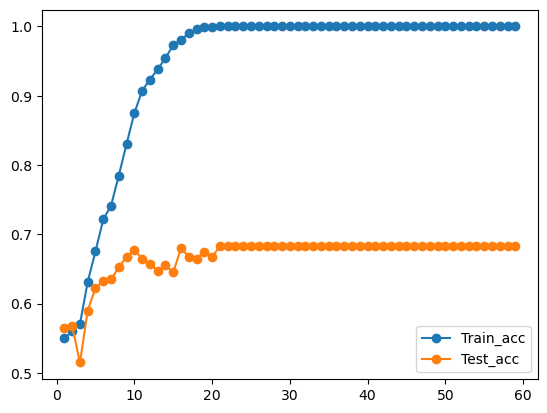

In [25]:
#pyplot 라이브러리 호출
from matplotlib import pyplot

pyplot.plot(range(1,60), train_scores, '-o', label='Train_acc') #주의! for문으로 서치한 정확도 i 값이랑 range 랑 일치해야함!
pyplot.plot(range(1,60), test_scores, '-o', label='Test_acc')
#pyplot 의 legend 

pyplot.legend()
pyplot.show()
#훈련데이터의 정확성과 테스트데이터의 정확성의 차이 격차가 크게
#벌어지기 시작하는 구간인 3이 가장 적절함

#교재와 xy가 뒤집혀 있음 참조!

#Dimension 이 다르면 shape 다르다고 오류발생 

## 최적나무깊이는 21 부터
### 와인의 경우 깊이 제한을 풀어도 과적합문제 미발생

In [26]:
tree = DecisionTreeClassifier(random_state=12345, max_depth=21)
#max_depth 3으로 지정
tree.fit(X_train, Y_train)
print('정확도: ', accuracy_score(Y_test,  tree.predict(X_test)))

정확도:  0.6825


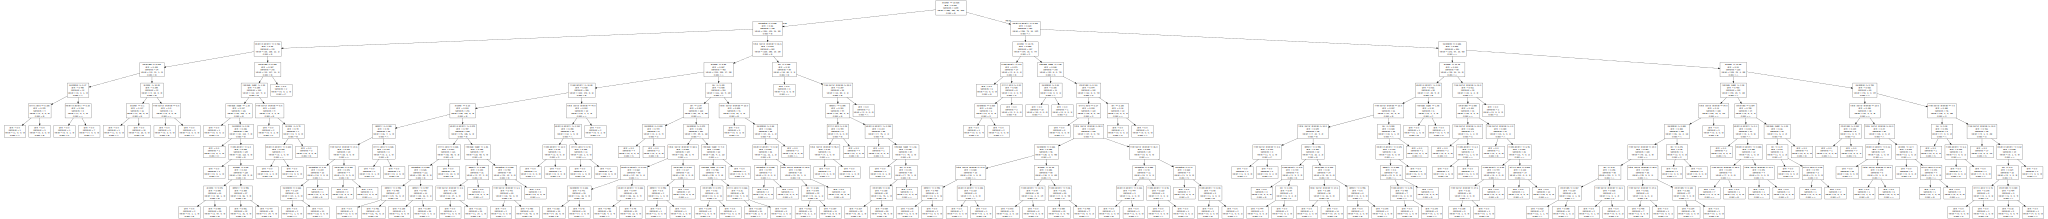

In [27]:
import graphviz
from sklearn.tree import export_graphviz

feature_name=['fixed acidity','volatile acidity','citric acid','residual sugar',
              'chlorides','free sulfur dioxide','total sulfur dioxide',
              'density','pH','sulphates','alcohol']
tree_graph = export_graphviz(tree1, feature_names=feature_name,
                             class_names=(['A','B','C','S']))
graphviz.Source(tree_graph)